# Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
mnist.data.shape

(70000, 784)

In [6]:
sample_digit = mnist.data[0]

In [7]:
sample_digit_img = sample_digit.reshape(28, 28)

(-0.5, 27.5, 27.5, -0.5)

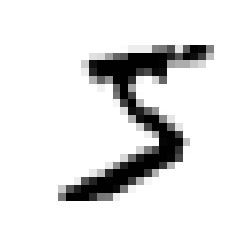

In [8]:
plt.imshow(sample_digit_img, cmap=plt.cm.binary, interpolation='nearest')
plt.axis('off')

In [9]:
mnist.target[0]

'5'

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)

In [12]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [13]:
y_train[:5]

array(['5', '1', '0', '0', '1'], dtype=object)

In [14]:
y_test[:5]

array(['9', '8', '9', '0', '1'], dtype=object)

In [15]:
X_train.shape

(56000, 784)

In [16]:
X_test.shape

(14000, 784)

In [17]:
y_train_5 = np.int32(y_train == '5')

In [18]:
y_train_5[:100]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

![](https://s3.amazonaws.com/files.dezyre.com/images/Tutorials/Performance-2.JPG)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_reg = LogisticRegression(solver='lbfgs',max_iter=500)

In [21]:
log_reg.fit(X_train, y_train_5)

C:\Users\win7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
log_reg.predict([sample_digit])

array([1])

In [23]:
from sklearn.linear_model import SGDClassifier

In [24]:
sgd_clf = SGDClassifier(loss='log', max_iter=1000, tol=1.0, n_jobs=-1)

In [25]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=1.0,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
sgd_clf.predict([sample_digit])

array([0])

# Calculating Accuracy of a classifier

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
scores

array([0.96271495, 0.96458992, 0.96598093])

In [29]:
scores_2 = cross_val_score(log_reg, X_train, y_train_5, cv=3, scoring='accuracy')
scores_2

C:\Users\win7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\win7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\win7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([0.9733219 , 0.97342905, 0.9726776 ])

In [30]:
scores_3 = cross_val_score(SGDClassifier(loss='hinge'), X_train, y_train_5, cv=3, scoring='accuracy')
scores_3

C:\Users\win7\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\win7\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\win7\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 a

array([0.97123266, 0.94123319, 0.95585557])